# Evaluating a machine learning model

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

### Three ways to evaluate Scikit-Learn models/estimators:
Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Across the board, the main idea of evaluating a model is to <b>compare the model's predictions to what they should've ideally been</b> (the truth labels).

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score() method`. Calling score() on a model instance will return a metric associated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring parameter`. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific `metric functions` available in `sklearn.metrics`. Similar to how the scoring parameter can be passedto  different scoring functions, Scikit-Learn implements these as standalone functions.

You can read more about these here:  
https://scikit-learn.org/stable/modules/model_evaluation.html

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions from regression problems.

Let's look at some examples.

## 1. Evaluating the model with `score` method

### 1.1 Classification Problem

If we bring down the code from our previous classification problem (building a classifier to predict whether or not someone has heart disease based on their medical records).

We can see the `score()` method come into play.

In [7]:
heart_disease = pd.read_csv("resources/heart-disease.csv")
heart_disease.head()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Once the model has been fit on the training data `(X_train, y_train)`, we can call the `score()` method on it and evaluate our model on the test data, data the model has never seen before `(X_test, y_test)`.

In [8]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8688524590163934

### 1.2 Regression Problem

Each model in Scikit-Learn implements a default metric for `score()` which is suitable for the problem.

For example:

* Classifier models generally use `metrics.accuracy_score()` as the default `score()` metric.
* Regression models generally use `metrics.r2_score` as the default `score()` metric.
* There many more classification and regression specific metrics implemented in `sklearn.metrics`.

Because `clf` is an instance of `RandomForestClassifier`, the `score()` method uses mean accuracy as its score method.

You can find this by pressing **SHIFT + TAB** (inside a Jupyter Notebook, may be different elsewhere) within the brackets of `score()` when called on a model instance.

Behind the scenes, `score()` makes predictions on `X_test` using the trained model and then compares those predictions to the actual labels `y_test`.

A classification model which predicts everything 100% correct would receive an accuracy score of 1.0 (or 100%).

Our model doesn't get everything correct, but at ~85% accuracy (0.85 * 100), it's still far better than guessing.

Let's do the same but with the regression code from above.

In [11]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

# Getting it into a dataframe
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df.head()

# Add a target variable to the dataframe from our dataset
housing_df["target"] = housing["target"]
housing_df.head()

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Due to the consistent design of the Scikit-Learn library, we can call the same score() method on model.

In [12]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8066196804802649

Here, `model` is an instance of `RandomForestRegressor`.

And since it's a regression model, the default metric built into `score()` is the coefficient of determination or R^2 (pronounced R-squared).

Remember, you can find this by pressing **SHIFT + TAB** within the brackets of `score()` when called on a model instance.

The best possible value here is 1.0; this means the model predicts the target regression values exactly.

Calling the `score()` method on any model instance and passing it test data is a good, quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your model's performance.

## 2. Evaluating a model using the `scoring` parameter

The next step up from using `score()` is to use a custom `scoring` parameter with [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

As you may have guessed, the scoring parameter you set will be different depending on the problem you're working on.

We'll see some specific examples of different parameters in a moment, but first, let's check out `cross_val_score()`.

To do so, we'll copy the heart disease classification code from above and then add another line at the top.

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

Using `cross_val_score()` is slightly different to `score()`.

Let's see a code example first and then we'll go through the details.

In [15]:
clf.score(X_test, y_test)

0.8524590163934426

The cross_val_score function in scikit-learn evaluates a model's performance using cross-validation. It repeatedly splits the data into training and testing sets, trains the model on the training data, and computes a score on the test data for each split (or "fold"). The function returns an array of these scores, providing a more robust estimate of how the model is expected to perform on unseen data compared to a single train-test split. 

In [16]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

What's happening here?

The first difference you might notice is `cross_val_score()` returns an array where as `score()` only returns a single number.

`cross_val_score()` returns an array because of a parameter called `cv`, which stands for cross-validation.

When `cv` isn't set, `cross_val_score()` will return an array of 5 numbers by default (`cv=None` is the same as setting `cv=5`).

Remember, you can see the parameters of a function using **SHIFT + TAB** (inside a Jupyter Notebook) from within the brackets.

But wait, you might be thinking, what even is cross-validation?

A visual might be able to help.

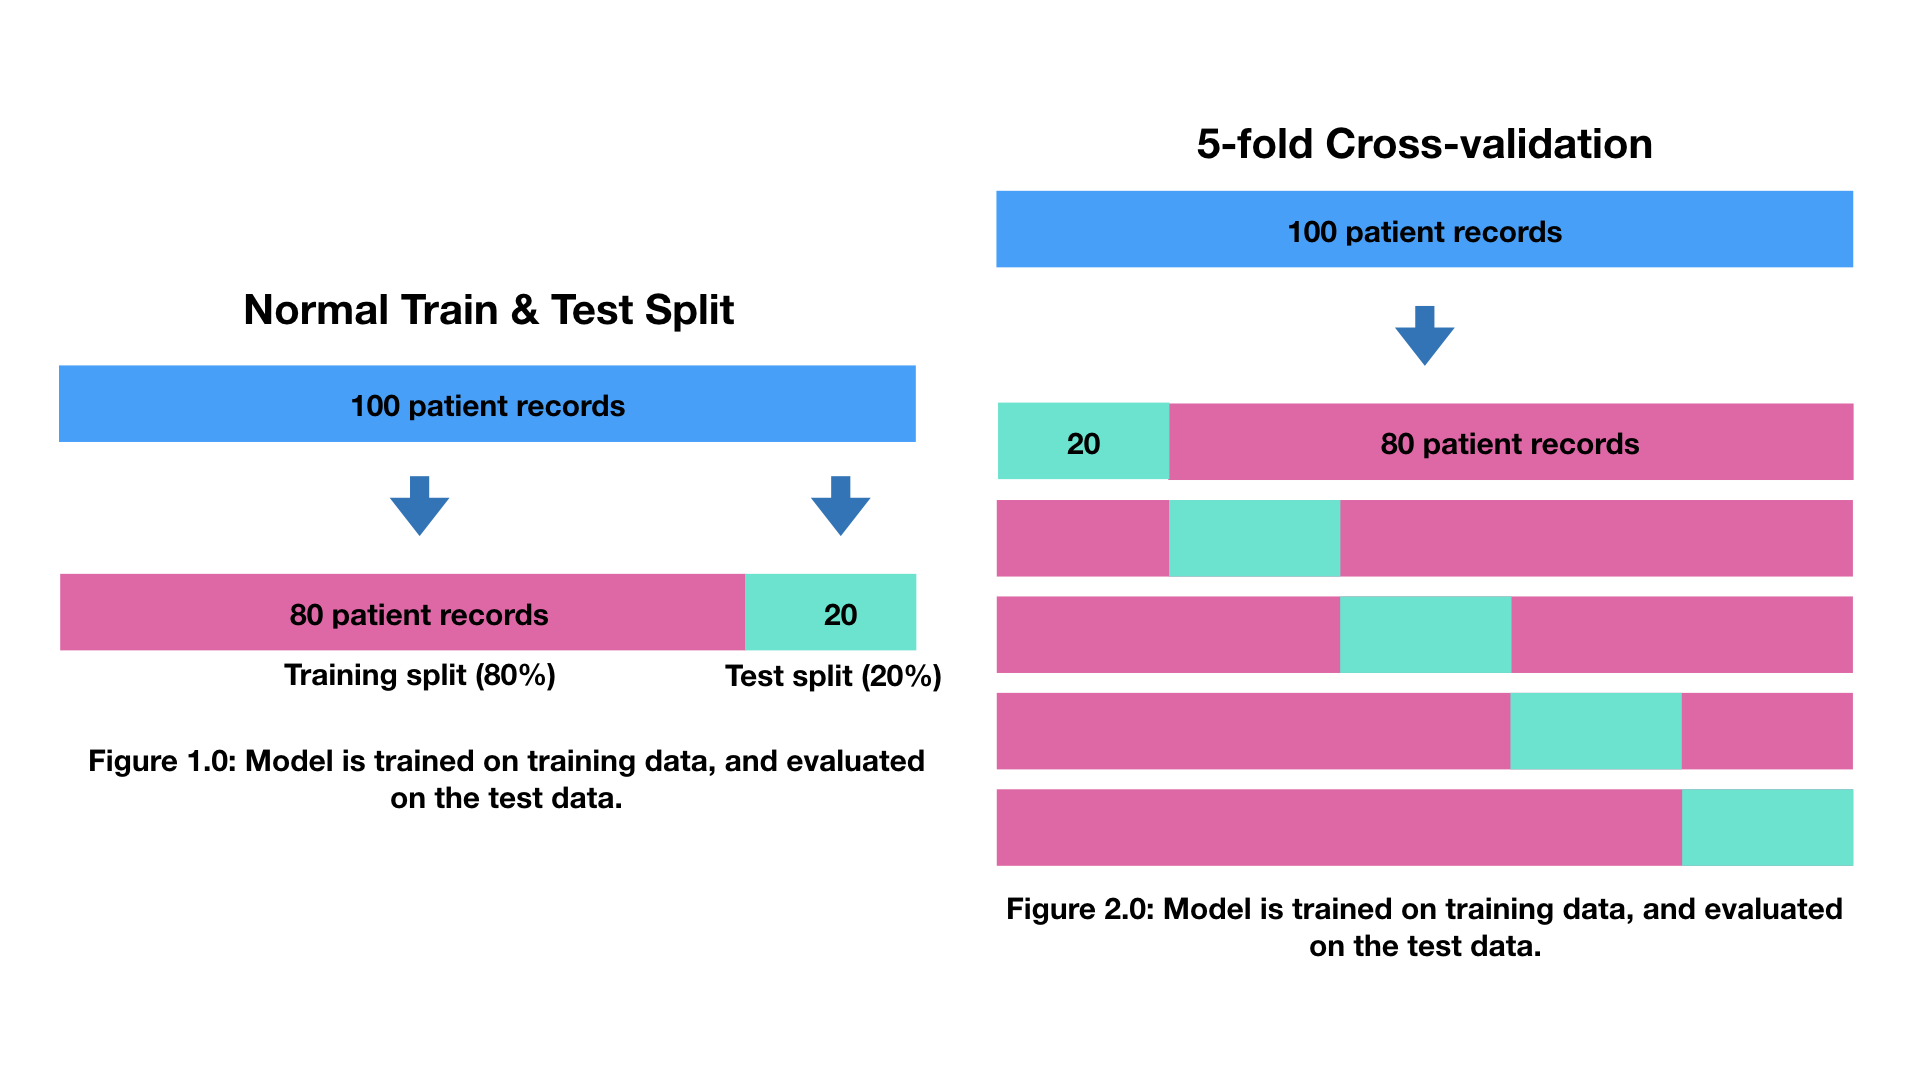

We've dealt with Figure 1.0 before using `score(X_test, y_test)`.

But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means that, depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset.

For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly.

The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method that tries to provide a solution to:
1. Not training on all the data (always keeping training and test sets separate).
2. Avoiding getting lucky scores on single splits of the data.
Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times.

On a different split each time, returning a score for each.

Why 5-fold?

The actual name of this setup K-fold cross-validation. Where K is an abitrary number. We've used 5 because it looks nice visually, and it is the default value in `sklearn.model_selection.cross_val_score`.

Figure 2.0 is what happens when we run the following.

In [17]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

Since we set cv=10 (10-fold cross-validation), we get back 10 different scores instead of 1.

Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 10 scores into one.

In [18]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Notice, the average `cross_val_score()` is slightly lower than single value returned by `score()`.

In this case, if you were asked to report the accuracy of your model, even though it's lower, you'd prefer the cross-validated metric over the non-cross-validated metric.

Wait?

We haven't used the `scoring` parameter at all.

By default, it's set to `None`.

In [19]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()
# Scoring parameter set to None by default 
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

> **Note**: If you notice different scores each time you call `cross_val_score`, this is because each data split is random every time. So the model may achieve higher/lower scores on different splits of the data. To get reproducible scores, you can set the random seed.

When `scoring` is set to `None` (by default), it uses the same metric as `score()` for whatever model is passed to `cross_val_score()`.

In this case, our model is `clf` which is an instance of `RandomForestClassifier` which uses mean accuracy as the default `score()` metric.

You can change the evaluation score `cross_val_score()` uses by changing the scoring parameter.

And as you might have guessed, different problems call for different evaluation scores.

The [Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) documentation outlines a vast range of evaluation metrics for different problems but let's have a look at a few.

### 2.1. Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

* [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall)  
* [Area under ROC curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) 
* [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)  
* [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

#### 2.1.1 Accuracy

Accuracy is the default metric for the `score()` function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [39]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [440]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [442]:
np.mean(cross_val_score)

0.8248087431693989

In [444]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### 2.1.2 Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)  
* Receiver Operating Characteristics (ROC curve)

If this one sounds like a mouthful, it's because reading the full name is.

It's usually referred to as AUC for Area Under Curve, and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if you hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true positive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1  
* False positive = model predicts 1 when truth is 0  
* True negative = model predicts 0 when truth is 0  
* False negative = model predicts 0 when truth is 1

For more information on these metrics, bookmark the following resources and refer to them when you need:  

[ROC and AUC, Clearly Explained!](https://www.youtube.com/watch?v=4jRBRDbJemM) by StatQuest  
[ROC documentation in Scikit-Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) (contains code examples)  
[How the ROC curve and AUC are calculated](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) by Google's Machine Learning team   

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the roc_curve function.

In [446]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [448]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [450]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [54]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

Looking at these on their own doesn't make much sense. It's much easier to see their value visually.

Let's create a helper function to make a ROC curve given the false positive rates (`fpr`) and true positive rates (`tpr`).

> **Note**: As of Scikit-Learn 1.2+, there is functionality of plotting a ROC curve. You can find this under `sklearn.metrics.RocCurveDisplay`.

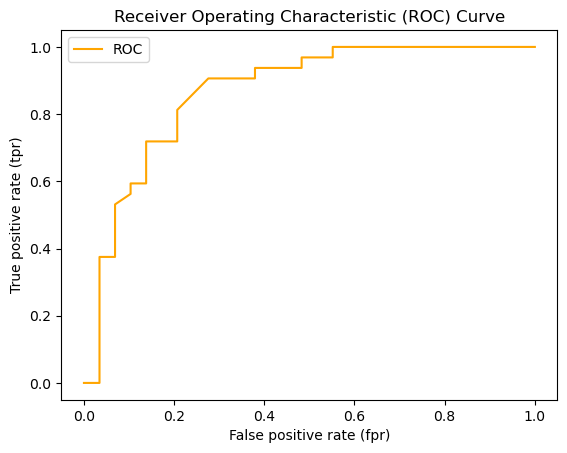

In [56]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)


Looking at the plot for the first time, it might seem a bit confusing.

The main thing to take away here is that our model is doing far better than guessing.

A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve).

Scikit-Learn implements a function to calculate this called `sklearn.metrics.roc_auc_score`.

The maximum ROC AUC score you can achieve is 1.0, and generally, the closer to 1.0, the better the model.

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

Although it was good practice, we didn't actually need to create our own `plot_roc_curve` function.

Scikit-Learn allows us to plot a ROC curve directly from our estimator/model by using the class method `sklearn.metrics.RocCurveDisplay.from_estimator` and passing it our `estimator`, `X_test` and `y_test`.

The most ideal position for a ROC curve to run along the top left corner of the plot.

This would mean the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0.

You can see this by creating a ROC curve using only the `y_test` labels.

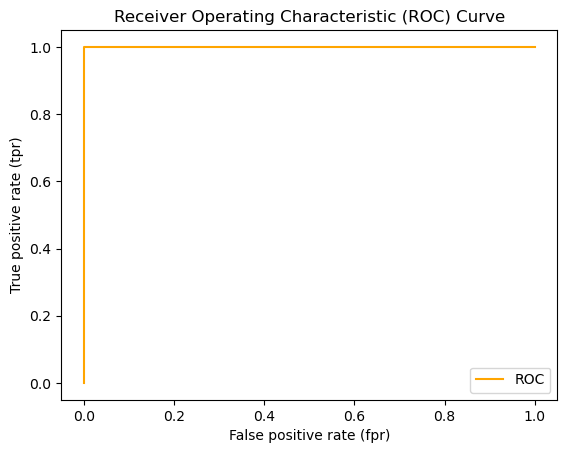

In [60]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [62]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

In reality, a perfect ROC curve is unlikely.

##### Final Notes 

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).  

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.  
The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not).

* A perfect model will get an AUC score of 1.


#### 2.1.3 Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix.](https://en.wikipedia.org/wiki/Confusion_matrix)  

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [72]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [74]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


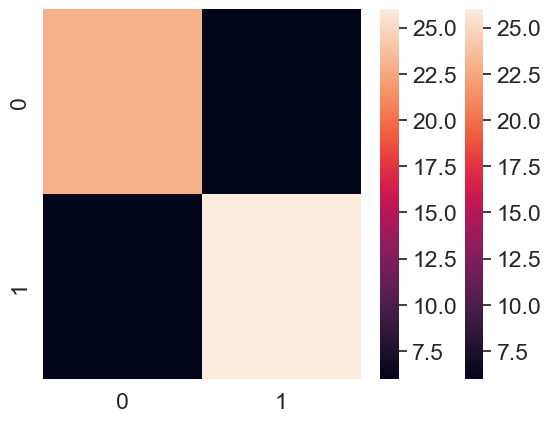

In [115]:
# For the below to work install seabourn module
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);
plt.show()

#### Creating a confusion matrix using Scikit-Learn  
Scikit-Learn has multiple different implementations of plotting confusion matrices:  

1. sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.  
2. sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.  
> **Note**: Both of these methods/classes require Scikit-Learn 1.0+.

To check your version of Scikit-Learn run:  

In [80]:
import sklearn
sklearn.__version__
# If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

'1.7.1'

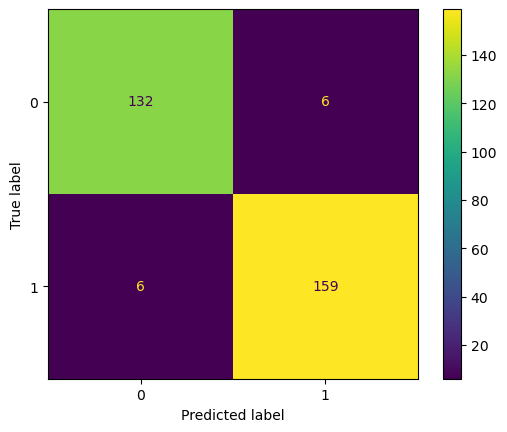

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);
plt.show()

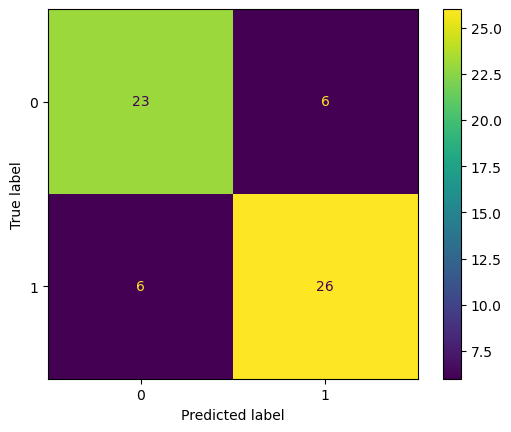

In [110]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);
plt.show()

#### 2.1.4 Classification Report

A classification report is more so a collection of metrics rather than a single one.  

You can create a classification report using Scikit-Learn's [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) method.


* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model that produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives that were correctly classified. A model that produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0; in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall, and F1 score between classes. Macro avg doesn't take class imbalance into account. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall, and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g., it will give a high value when one class outperforms another due to having more samples).

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.  

The number of rows will depend on how many different classes there are.   
But there will always be three rows: label accuracy, macro avg, and weighted avg.

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all it's doing is predicting no one has the disease, in other words, all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall, and F1 score.

In [129]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.
> **Resource**: For more on precision and recall and the tradeoffs between them, I'd suggest going through the [Scikit-Learn Precision-Recall guide](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html).

### 2.2. Regression model evaluation metrics

Similar to classification, there are several metrics you can use to evaluate your [regression models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

We'll check out the following.

* **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.
* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better.
* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

Let's see them in action. First, we'll bring down our regression model code again.

### 2.2.1 R^2

What R-squared does:  
Compares your model's predictions to the mean of the targets.  
Values can range from negative infinity (a very poor model) to 1.  
For example, if all your model does is predict the mean of the targets, its R^2 value would be 0.  
And if your model perfectly predicts a range of numbers, its R^2 value would be 1.  

In [176]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [168]:
# Once you've got a trained regression model, the default evaluation metric in the score() function is R^2.
model.score(X_test, y_test)

0.8066196804802649

In [154]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [156]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [158]:
# 
y_test.mean()

2.0550030959302323

Outside of the `score()` function, R^2 can be calculated using Scikit-Learn's `r2_score()` function.

In [170]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [162]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

A model that only predicted the mean would get a score of 0.

In [164]:
# A model that only predicted the mean would get a score of 0.
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

And a perfect model would get a score of 1.

In [172]:
# And a perfect model would get a score of 1.
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

### 2.2.2 Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values.  

It gives you an idea of how wrong your models predictions are.  

A model's mean absolute error can be calculated with Scikit-Learn's `sklearn.metrics.mean_absolute_error` method.

In [181]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

Our model achieves an MAE of 0.327.  

This means, on average, our models' predictions are 0.327 units away (plus or minus) from the actual value. 

Let's make it a little more visual.  

In [183]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


You can see the predictions are slightly different from the actual values.  

Depending on what problem you're working on, having a difference as we do now might be okay.  
On the flip side, it may also not be okay, meaning the predictions would have to be closer.

In [185]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

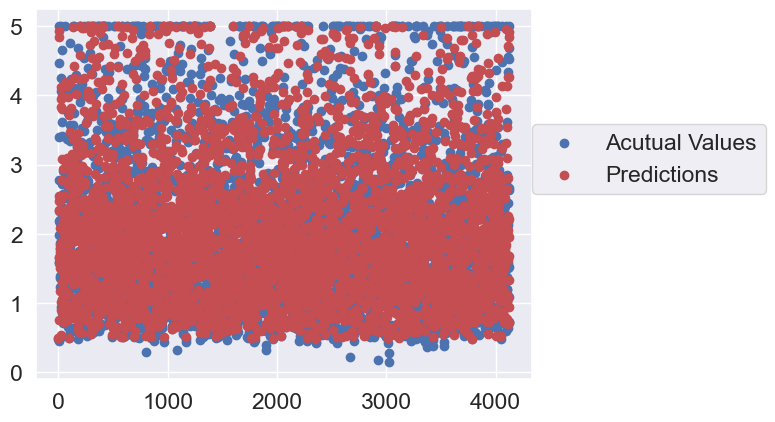

In [200]:
# Visualizing actual vs predicted values
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predicted values"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));
plt.show()

### 2.2.3 Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.  

We can calculate it with Scikit-Learn's `sklearn.metrics.mean_squared_error`.

In [204]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

MSE will often be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

In [206]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [208]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [212]:
df_large_error = df.copy()
# df_large_error.iloc[0]["squared_differences"] = 16 # increase "squared_differences" for 1 sample
df_large_error.loc[df_large_error.index[0], "squared_differences"] = 16

In [214]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [216]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [218]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.540290,0.354290,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [255]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7333540351264799

Now you might be thinking, which regression evaluation metric should you use?  

* R^2 is similar to accuracy. It gives you a quick indication of how well your model is performing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions is on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
    * Pay more attention to MAE: When being \$10,000 off is **twice** as bad as being \$5,000 off.  
    * Pay more attention to MSE: When being \$10,000 off is **more than twice** as bad as being \$5,000 off.  
    
> **Note**: What we've covered here is only a handful of potential metrics you can use to evaluate your models. If you're after a complete list, check out the [Scikit-Learn metrics and scoring documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

### 2.3 Finally using the scoring parameter 

We've covered a bunch of ways to evaluate a model's predictions but haven't even touched the scoring parameter...

Not to worry, it's very similar to what we've been doing!

As a refresh, the scoring parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

Let's check it out with our classification model and the heart disease dataset.

#### 2.3.1 Classification Problem

In [486]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

First, we'll use the default, which is mean accuracy.

In [497]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y) # if scoring not specified, then by default scoring=None, default cv=5, i.e., esitmator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [499]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


We've seen this before, now we got 5 different accuracy scores on different test splits of the data.

Averaging this gives the cross-validated accuracy.

We can find the same using the scoring parameter and passing it "None".

In [458]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, estimator's default scoring evaluation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [403]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


We can find the same using the scoring parameter and passing it "accuracy".

In [405]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [407]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


The same goes for the other metrics we've been using for classification.

Let's try "precision".

In [409]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [411]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


Next let's try "recall".

In [413]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [415]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


And "f1" (for F1 score)?

In [466]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


We can repeat this process with our regression metrics.

Let's revisit our regression model.

#### 2.3.2 Regression Problem

Let's see the `scoring parameter` being using for a regression problem...

In [507]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

The default is `"r2"`.

> **Note**: We can time how long a single cell of code takes to run using the `%%time` [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-time) command.

In [475]:
%%time
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

CPU times: user 29.1 s, sys: 338 ms, total: 29.4 s
Wall time: 29.6 s


0.6545756342466266

In [427]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [511]:
%%time
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring="r2")
np.mean(cv_r2)

CPU times: user 28.5 s, sys: 305 ms, total: 28.8 s
Wall time: 29 s


0.6545756342466266

In [513]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

What about `"neg_mean_squared_error"` for MSE (mean squared error)?

In [478]:
%%time
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

CPU times: user 1min 2s, sys: 639 ms, total: 1min 3s
Wall time: 1min 3s


-0.4302688111843372

Why the "neg_"?

Because Scikit-Learn documentation states:

> ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Which in this case, means a lower negative value (closer to 0) is better.

In [431]:
cv_mse

array([-0.52532899, -0.34772023, -0.37442475, -0.43896032, -0.46490977])

But we can use `"neg_mean_absolute_error"` for MAE (mean absolute error).

In [433]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46681015659399233

In [435]:
cv_mae

array([-0.54518527, -0.41051585, -0.43822943, -0.46672399, -0.47339624])

All the supporting scoring metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-string-names) 

## 3. Using different evaluation metrics with Scikit-Learn

Remember the third way of evaluating Scikit-Learn functions?

> 3. Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### 3.1 Classification functions
For:

* Accuracy, we can use `sklearn.metrics.accuracy_score`
* Precisio,n we can use `sklearn.metrics.precision_score`
* Recall, we can use `sklearn.metrics.recall_score`
* F1, we can use `sklearn.metrics.f1_score`

In [377]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


### 3.2 Regression metrics
We can use a similar setup for our regression problem, just with different methods.

For:

* R^2 we can use `sklearn.metrics.r2_score`
* MAE (mean absolute error), we can use `sklearn.metrics.mean_absolute_error`
* MSE (mean squared error), we can use `sklearn.metrics.mean_squared_error`

In [379]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


Because evaluating a model's predictions is as important as training a model in any machine learning project.

There's nothing worse than training a machine learning model and optimizing for the wrong evaluation metric.

Keep the metrics and evaluation methods we've gone through when training your future models.

If you're after extra reading, I'd go through the [Scikit-Learn guide for model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html).

Now we've seen some different metrics we can use to evaluate a model, let's see some ways we can improve those metrics.

# Machine Learning Model Evaluation - Summary

Evaluating the results of a machine learning model is as important as building one.  
But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.  
Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

## <u>Classification</u>

### Classification Model Evaluation Metrics/Techniques

1. Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

2. Precision - Indicates the proportion of positive identifications (model predicted class 1) 
which were actually correct. A model which produces no false positives has a precision of 1.0.

3. Recall - Indicates the proportion of actual positives which were correctly classified. 
A model which produces no false negatives has a recall of 1.0.

4. F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

5. Confusion matrix - Compares the predicted values with the true values in a tabular way, 
if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

6. Cross-validation - Splits your dataset into multiple parts and train and 
tests your model on each part then evaluates performance as an average.

7. Classification report - Sklearn has a built-in function called classification_report() 
which returns some of the main classification metrics such as precision, recall and f1-score.

8. ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate 
versus false-positive rate.

9. Area Under Curve (AUC) Score - The area underneath the ROC curve. 
A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?

1. Accuracy is a good measure to start with if all classes are balanced 
(e.g. same amount of samples which are labelled with 0 or 1).

2. Precision and recall become more important when classes are imbalanced.

3. If false-positive predictions are worse than false-negatives, 
aim for higher precision.

4. If false-negative predictions are worse than false-positives, aim for higher recall.

5. F1-score is a combination of precision and recall.

6. A confusion matrix is always a good way to visualize how a classification model is going.

## <u> Regression </u>

## Regression Model Evaluation Metrics/Techniques

1. R^2 (pronounced r-squared) or the coefficient of determination - 
Compares your model's predictions to the mean of the targets. 
Values can range from negative infinity (a very poor model) to 1. 
For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. 
And if your model perfectly predicts a range of numbers, its R^2 value would be 1.

2. Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your predictions were.

4. Mean squared error (MSE) - The average squared differences between predictions and actual values.
Squaring the errors removes negative errors. It also amplifies outliers (samples that have larger errors).

## Which regression metric should you use?

1. R2 is similar to accuracy. 
It gives you a quick indication of how well your 
model might be doing. Generally, the closer your R2 value is to 1.0, 
the better the model. But it doesn't really tell exactly how wrong your 
model is in terms of how far off each prediction is.

2. MAE gives a better indication of how far off each of your model's predictions is on average.

3. As for MAE or MSE, because of the way MSE is calculated, 
Squaring the differences between predicted values and actual values amplifies larger differences. 
Let's say we're predicting the value of houses (which we are).  
* Pay more attention to MAE: When being \$10,000 off is **twice as bad** as being \$5,000 off.  
* Pay more attention to MSE: When being \$10,000 off is **more than twice as bad** as being \$5,000 off.  

## For more resources on evaluating a machine learning model, be sure to check out the following resources:

[scikit-learn documentation for metrics and scoring (quantifying the quality of predictions)](
https://scikit-learn.org/stable/modules/model_evaluation.html)

[Beyond Accuracy: Precision and Recall by Will Koehrsen](https://medium.com/towards-data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c)

[Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832)